# Building the Neural Network

In [1]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### Get device for Training

In [2]:
device = (
    "cuda"
    if torch.cuda.is_available() # NVIDIA CUDA
    else "mps"
    if torch.backends.mps.is_available() # mps device enables high-performance training on GPU for MacOS devices with Metal programming framework.(Metal Performance Shaders)
    else "cpu"
)

print(f"Using {device} device")

Using cpu device


### Defining the Class

In [3]:
class NeuralNetwork(nn.Module):

  def __init__(self):
    super().__init__()
    self.flatten = nn.Flatten() # flattens a contiguous range of dims into a tensor
    # nn.flatten() except the batch size, and the rest of them are flattened
    self.linear_relu_stack = nn.Sequential(
        nn.Linear(28*28, 512), # input image size
        nn.ReLU(),
        nn.Linear(512, 512),
        nn.ReLU(),
        nn.Linear(512, 10), # 10 - ouput classes
      )

  def forward(self, x):
    x = self.flatten(x)
    logits = self.linear_relu_stack(x)
    return logits

In [4]:
model = NeuralNetwork().to(device)

print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [5]:
X = torch.rand(1, 28, 28, device= device)
logits = model(X)
pred_probab = nn.Softmax(dim= 1)(logits) #applies softmax function to an n-dimensional input tensor
y_pred = pred_probab.argmax(1)
print(f"Predicted class: {y_pred}")

Predicted class: tensor([5])


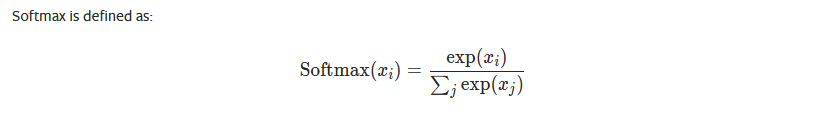

### Model Layers

In [6]:
input_image = torch.rand(3, 28, 28)
print(input_image.size())

torch.Size([3, 28, 28])


#### nn.Flatten

In [7]:
flatten = nn.Flatten()
flat_image = flatten(input_image)

print(flat_image.size())

torch.Size([3, 784])


#### nn.Linear

In [8]:
layer1 = nn.Linear(in_features= 28*28, out_features= 20)
hidden1 = layer1(flat_image)
print(hidden1.size())

torch.Size([3, 20])


#### nn.ReLU

In [9]:
print(f"Before ReLU: {hidden1}\n\n")
hidden1 = nn.ReLU()(hidden1)
print(f"After ReLU: {hidden1}")

Before ReLU: tensor([[ 0.0506,  0.0903,  0.1236,  0.2977,  0.6257,  0.0199,  0.4836,  0.0431,
          0.6444,  0.0121,  0.2166,  0.4112,  0.2887,  0.1156, -0.2547, -0.3452,
          0.0981,  0.1162,  0.2522, -0.4512],
        [ 0.0920, -0.0208,  0.2869,  0.2359,  0.4925,  0.1166,  0.2072,  0.0868,
          0.0633, -0.1382, -0.0142,  0.1018,  0.2372, -0.0371, -0.1004, -0.4933,
         -0.1950,  0.4220,  0.1544,  0.0709],
        [ 0.0744, -0.1609,  0.3804,  0.2189,  0.4490,  0.1421,  0.2291,  0.1487,
          0.5676, -0.1461,  0.0212,  0.4310,  0.1477, -0.1290, -0.1969, -0.5252,
          0.0170,  0.4339,  0.6319, -0.1854]], grad_fn=<AddmmBackward0>)


After ReLU: tensor([[0.0506, 0.0903, 0.1236, 0.2977, 0.6257, 0.0199, 0.4836, 0.0431, 0.6444,
         0.0121, 0.2166, 0.4112, 0.2887, 0.1156, 0.0000, 0.0000, 0.0981, 0.1162,
         0.2522, 0.0000],
        [0.0920, 0.0000, 0.2869, 0.2359, 0.4925, 0.1166, 0.2072, 0.0868, 0.0633,
         0.0000, 0.0000, 0.1018, 0.2372, 0.0000, 0.00

#### nn.Sequential

In [10]:
seq_modules = nn.Sequential(flatten, layer1, nn.ReLU(), nn.Linear(20, 10))
input_image = torch.rand(3, 28, 28)
logits = seq_modules(input_image)

#### nn.Softmax

In [11]:
softmax = nn.Softmax(dim= 1)
pred_probab = softmax(logits)

### Model Parameters

In [12]:
print(f"Model Parameters: {model}\n\n")

for name, param in model.named_parameters():
  print(f"Layer: {name} | Size: {param.size()} | Values: {param[:2]} \n")

Model Parameters: NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


Layer: linear_relu_stack.0.weight | Size: torch.Size([512, 784]) | Values: tensor([[-0.0054, -0.0305,  0.0040,  ...,  0.0337, -0.0277, -0.0032],
        [-0.0265,  0.0100,  0.0214,  ..., -0.0142, -0.0006,  0.0088]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.0.bias | Size: torch.Size([512]) | Values: tensor([ 0.0019, -0.0029], grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.weight | Size: torch.Size([512, 512]) | Values: tensor([[ 0.0217, -0.0068, -0.0229,  ...,  0.0062,  0.0156, -0.0289],
        [ 0.0043,  0.0378, -0.0299,  ..., -0.0162, -0.0065, -0.0003]],
       grad_fn=<SliceBackward0>) 

Layer: linear_relu_stack.2.bias | Si